Python notebook for rendering panels from Figure 4 of Matikainen-Ankney et al 2021

> Indented block




In [1]:
!pip install seaborn==0.9.0 &> /dev/null
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="white")

     |████████████████████████████████| 215kB 6.1MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import compiled dataframe
df_binned_multi = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig4/df_binned_multi.csv"
df_binned_multi = pd.read_csv(url, parse_dates = True)
df_binned_multi.head()

,Unnamed: 0,MM:DD:YYYY hh:mm:ss,Device_Number,Battery_Voltage,Motor_Turns,Session_Type,Event,Active_Poke,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Retrieval_Time,filename,RelativeTime,poke_int,Errors,Nighttime,RelativeTime2,Retrieval_Time_filt,Errors_binned,Successes_binned,NewRT,active_bias
0,0.0,2020-06-08 18:49:00,0.0,3.71,3.0,1.0,Poke,Left,20.0,8.0,20.0,NaN,FED1.CSV,0 days 03:54:00,0 days 02:22:00,1.0,0.0,14040.0,NaN,NaN,NaN,0.0,NaN
1,4.0,2020-06-08 22:36:00,0.0,3.69,3.0,1.0,Poke,Left,45.0,16.0,45.0,NaN,FED1.CSV,0 days 07:41:00,0 days 00:46:00,1.0,1.0,27660.0,NaN,8.0,25.0,4.0,75.757576
2,8.0,2020-06-09 02:14:00,0.0,3.67,3.0,1.0,Poke,Left,54.0,24.0,54.0,NaN,FED1.CSV,0 days 11:19:00,0 days 01:19:00,1.0,1.0,40740.0,NaN,8.0,9.0,8.0,52.941176
3,12.0,2020-06-09 06:49:00,0.0,3.66,2.0,1.0,Poke,Left,60.0,32.0,60.0,NaN,FED1.CSV,0 days 15:54:00,0 days 01:17:00,1.0,1.0,57240.0,NaN,8.0,6.0,12.0,42.857143
4,16.0,2020-06-09 10:40:00,0.0,3.66,3.0,1.0,Poke,Left,70.0,41.0,70.0,NaN,FED1.CSV,0 days 19:45:00,0 days 01:25:00,1.0,0.0,71100.0,NaN,9.0,10.0,16.0,52.631579


(0.0, 25.0)

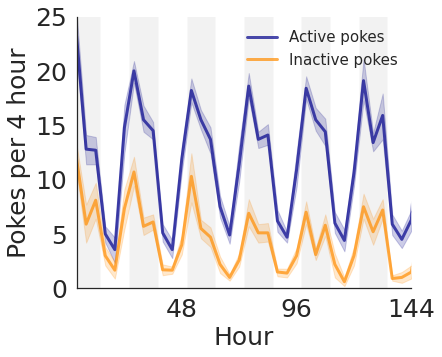

In [3]:
#Fig 4B

import matplotlib.ticker as ticker


sns_plot, ax = plt.subplots(figsize = (6,5))

sns.set_style("white")

sns_plot = sns.lineplot(data = df_binned_multi, 
                   y = "Successes_binned", 
                   x = "NewRT", label = 'Active pokes', 
                   color='darkblue',
                    lw=3, ci=67, alpha=.7)

sns_plot = sns.lineplot(data = df_binned_multi, 
                   y = "Errors_binned", 
                   x = "NewRT",  label = 'Inactive pokes',  
                   color='darkorange',
                    lw=3, ci=67, alpha=.7)

# Formating legend and labels

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right',prop={'size': 15}, frameon=False)

#plt.title("FR", fontsize=25)
plt.ylabel("Pokes per 4 hour", fontsize=25)
plt.xlabel("Hour", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.xaxis.set_major_locator(ticker.MultipleLocator(48))

#plt.ylim(-10,110)
plt.fill([0,14,14,0],[-1,-1,30,30],'grey', alpha=0.1)
plt.fill([26,38,38,26],[-1,-1,30,30],'grey', alpha=0.1)
plt.fill([50,62,62,50],[-1,-1,30,30],'grey', alpha=0.1)
plt.fill([74,86,86,74],[-1,-1,30,30],'grey', alpha=0.1)
plt.fill([98,110,110,98],[-1,-1,30,30],'grey', alpha=0.1)
plt.fill([122,134,134,122],[-1,-1,30,30],'grey', alpha=0.1)


plt.xlim(4,144) 
plt.ylim(0,25)

###uncomment below to download figure
# from google.colab import files
# plt.savefig("6day.pdf", bbox_inches = 'tight')
# files.download("6day.pdf")



In [4]:
# import compiled dataframe
df_circ = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig4/df_circ.csv"
df_circ = pd.read_csv(url, parse_dates = True)
df_circ.head()

,Unnamed: 0,MM:DD:YYYY hh:mm:ss,Device_Number,Battery_Voltage,Motor_Turns,Session_Type,Event,Active_Poke,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Retrieval_Time,filename,RelativeTime,poke_int,Errors,Nighttime,RelativeTime2,Retrieval_Time_filt,Errors_binned,Successes_binned,NewRT,active_bias,hour,phase_shifted
0,0.0,2020-06-08 18:49:00,0.0,3.71,3.0,1.0,Poke,Left,20.0,8.0,20.0,NaN,FED1.CSV,0 days 03:54:00,0 days 02:22:00,1.0,0.0,14040.0,NaN,NaN,NaN,0.0,NaN,18.0,12.0
1,4.0,2020-06-08 22:36:00,0.0,3.69,3.0,1.0,Poke,Left,45.0,16.0,45.0,NaN,FED1.CSV,0 days 07:41:00,0 days 00:46:00,1.0,1.0,27660.0,NaN,8.0,25.0,4.0,75.757576,22.0,16.0
2,8.0,2020-06-09 02:14:00,0.0,3.67,3.0,1.0,Poke,Left,54.0,24.0,54.0,NaN,FED1.CSV,0 days 11:19:00,0 days 01:19:00,1.0,1.0,40740.0,NaN,8.0,9.0,8.0,52.941176,2.0,20.0
3,12.0,2020-06-09 06:49:00,0.0,3.66,2.0,1.0,Poke,Left,60.0,32.0,60.0,NaN,FED1.CSV,0 days 15:54:00,0 days 01:17:00,1.0,1.0,57240.0,NaN,8.0,6.0,12.0,42.857143,6.0,24.0
4,16.0,2020-06-09 10:40:00,0.0,3.66,3.0,1.0,Poke,Left,70.0,41.0,70.0,NaN,FED1.CSV,0 days 19:45:00,0 days 01:25:00,1.0,0.0,71100.0,NaN,9.0,10.0,16.0,52.631579,10.0,4.0


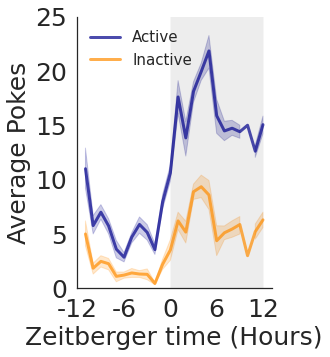

In [5]:
#Fig 4C
import matplotlib.ticker as ticker


###graph:

sns_plot, ax = plt.subplots(figsize = (3.5,5))
sns.set_style("white")

sns_plot = sns.lineplot(data = df_circ, 
                   y = "Successes_binned", x = "phase_shifted", color='darkblue', label='Active', lw=3, ci=67, alpha=.7)


sns_plot = sns.lineplot(data = df_circ, 
                   y = "Errors_binned", x = "phase_shifted", color='darkorange', label='Inactive', lw=3, ci=67, alpha=.7)

plt.fill([12,24,24,12],[0,0,35,35],'black',alpha=0.07)
x = [1,2,3,4,5,6,7]

labels = ['a','-12','-6','0','6','12']
plt.xticks(x, labels, rotation='horizontal')

#plt.title("Baseline", fontsize=20)
plt.ylabel("Average Pokes", fontsize=25)
plt.xlabel("Zeitberger time (Hours)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.ylim(0,25)
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper left',prop={'size': 15}, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

###uncomment below to download figure
# from google.colab import files
# plt.savefig("6day_circ.pdf", bbox_inches = 'tight')
# files.download("6day_circ.pdf")


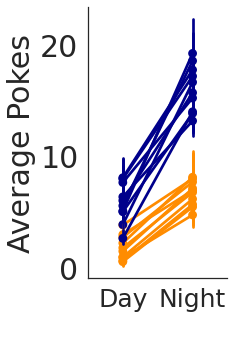

In [6]:
#Fig 4D
my_pal_successs = {'FED10.CSV':"darkblue",'FED9.CSV':"darkblue",'FED7.CSV':"darkblue",'FED5.CSV':"darkblue",'FED2.CSV':"darkblue",'FED4.CSV':"darkblue",'FED8.CSV':"darkblue",'FED6.CSV':"darkblue",'FED1.CSV':"darkblue",'FED3.CSV':"darkblue",}

sns_plot, ax = plt.subplots(figsize = (2.5,5))
sns.set_style("white")
sns_plot = sns.pointplot(data = df_binned_multi,
           y = "Successes_binned", x = "Nighttime", 
           order=[0, 1],  label='Active',
           hue = "filename", palette = my_pal_successs,
           scale=1)


my_pal_errors = {'FED10.CSV':"darkorange",'FED9.CSV':"darkorange",'FED7.CSV':"darkorange",'FED5.CSV':"darkorange",'FED2.CSV':"darkorange",'FED4.CSV':"darkorange",'FED8.CSV':"darkorange",'FED6.CSV':"darkorange",'FED1.CSV':"darkorange",'FED3.CSV':"darkorange",}
sns_plot = sns.pointplot(data = df_binned_multi,
                   y = "Errors_binned", x = "Nighttime",
           order=[0, 1], label='Inactive',  
           hue = "filename", palette = my_pal_errors,
           scale=1)


handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper left',prop={'size': 15}, frameon=False)


x = [0,1]
labels = ["Day","Night"]
plt.xticks(x, labels, rotation='horizontal')

plt.ylabel("Average Pokes", fontsize=30)
plt.xlabel(" ", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=30)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_visible(False)

###uncomment below to download figure
# from google.colab import files
# plt.savefig("6day_pointp.pdf", bbox_inches = 'tight')
# files.download("6day_pointp.pdf")

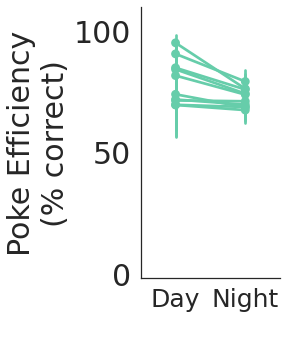

In [7]:
#Fig 4E
my_pal_bias = {'FED10.CSV':"mediumaquamarine",'FED9.CSV':"mediumaquamarine",'FED7.CSV':"mediumaquamarine",'FED5.CSV':"mediumaquamarine",'FED2.CSV':"mediumaquamarine",'FED4.CSV':"mediumaquamarine",'FED8.CSV':"mediumaquamarine",'FED6.CSV':"mediumaquamarine",'FED1.CSV':"mediumaquamarine",'FED3.CSV':"mediumaquamarine",}


sns_plot, ax = plt.subplots(figsize = (2.5,5))
sns.set_style("white")
sns_plot = sns.pointplot(data = df_circ,
           y = "active_bias", x = "Nighttime", palette = my_pal_bias, 
           order=[0, 1],
           hue = "filename",
           scale=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper left',prop={'size': 15}, frameon=False)
plt.ylim(-2,110)

x = [0,1]
labels = ["Day","Night"]
plt.xticks(x, labels, rotation='horizontal')

plt.ylabel("Poke Efficiency\n(% correct)", fontsize=30)
plt.xlabel(" ", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=30)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_visible(False)

###uncomment below to download figure
# from google.colab import files
# plt.savefig("bias_pointp.pdf", bbox_inches = 'tight')
# files.download("bias_pointp.pdf")